## EXP2 model and related test

(array([186866.,  29816.,   9992.,   5147.,   3456.,   2689.,   2378.,
          1882.,   1593.,   7181.]),
 array([1.8871788e-11, 1.0000000e-03, 1.9999999e-03, 3.0000000e-03,
        3.9999997e-03, 4.9999999e-03, 6.0000001e-03, 6.9999998e-03,
        7.9999994e-03, 8.9999996e-03, 9.9999998e-03], dtype=float32),
 <BarContainer object of 10 artists>)

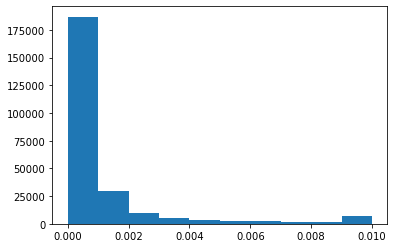

In [15]:
import AssortmentGenerator as AG
import MarkovGenerator as MG
import Models
import time

import numpy as np
import torch
import torch.nn as nn

from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

N_prod = 250        # number of products
Vec_Len = N_prod + 1
Neck_Len = 30       # bottle neck width
SAMPLE_AMOUNT = 1000


transP = np.load("EXP2_dump/markov_matrix.npy")
lams = np.load("EXP2_dump/arriving_lambda.npy")

model = torch.load("EXP2_dump/bottleneck_model.pth")

# generate synthetic data
INPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
for i in range(SAMPLE_AMOUNT):
    assort = AG.GenAssortment_Sparse(N_prod)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)
    
INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.mse_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1e-3)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max=0.01).detach().numpy()

plt.hist(losses)



## what if dense?

(array([74013., 18234.,  9145.,  4634.,  2874.,  2392.,  1952.,  1539.,
         1191.,  9526.]),
 array([6.22699930e-14, 1.99999986e-03, 3.99999972e-03, 6.00000005e-03,
        7.99999945e-03, 9.99999978e-03, 1.20000001e-02, 1.39999995e-02,
        1.59999989e-02, 1.79999992e-02, 1.99999996e-02], dtype=float32),
 <BarContainer object of 10 artists>)

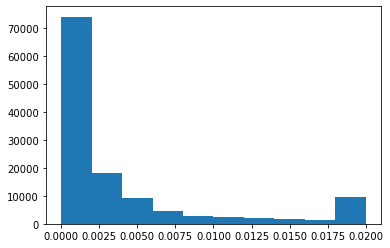

In [9]:
# generate synthetic data
DENSE_AMOUNT = 500


INPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
for i in range(DENSE_AMOUNT):
    assort = AG.GenAssortment_Fixed(N_prod, fixed_num = N_prod-1)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)


INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.mse_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1e-3)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max = 0.02).detach().numpy()

plt.hist(losses)

(array([90405., 16547.,  7415.,  3262.,  1413.,   748.,   628.,   461.,
          371.,  4250.]),
 array([6.35274082e-12, 1.99999986e-03, 3.99999972e-03, 6.00000005e-03,
        7.99999945e-03, 9.99999978e-03, 1.20000001e-02, 1.39999995e-02,
        1.59999989e-02, 1.79999992e-02, 1.99999996e-02], dtype=float32),
 <BarContainer object of 10 artists>)

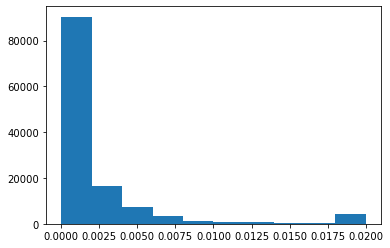

In [11]:
# generate synthetic data
DENSE_AMOUNT = 500


INPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
for i in range(DENSE_AMOUNT):
    assort = AG.GenAssortment_Even(N_prod, lam = 2/3)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)


INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.mse_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1e-3)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max = 0.02).detach().numpy()

plt.hist(losses)

## even for relative SE loss, even for dense assortment, the performance is great

## now check EXP4

(array([80732., 92732., 40034., 13988.,  5074.,  1847.,   722.,   410.,
          341., 15120.]),
 array([5.2548471e-10, 1.0000004e-03, 2.0000003e-03, 3.0000003e-03,
        4.0000002e-03, 5.0000004e-03, 6.0000001e-03, 7.0000002e-03,
        8.0000004e-03, 8.9999996e-03, 9.9999998e-03], dtype=float32),
 <BarContainer object of 10 artists>)

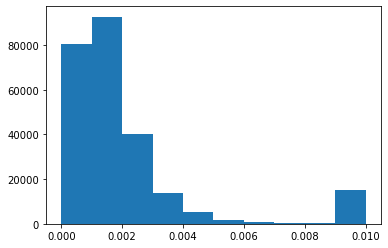

In [16]:
import AssortmentGenerator as AG
import MarkovGenerator as MG
import Models
import time

import numpy as np
import torch
import torch.nn as nn

from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

N_prod = 250        # number of products
Vec_Len = N_prod + 1
Neck_Len = 30       # bottle neck width
SAMPLE_AMOUNT = 1000


transP = np.load("EXP4_dump/markov_matrix.npy")
lams = np.load("EXP4_dump/arriving_lambda.npy")

model = torch.load("EXP4_dump/MarkovStructure_model.pth")

# generate synthetic data
INPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
for i in range(SAMPLE_AMOUNT):
    assort = AG.GenAssortment_Sparse(N_prod)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)
    
INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.mse_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1e-3)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max=0.01).detach().numpy()

plt.hist(losses)



(array([16631., 15570., 14796., 13575., 11445., 12985., 10461., 13462.,
        15279.,  1296.]),
 array([5.6300322e-11, 9.0579188e-04, 1.8115838e-03, 2.7173755e-03,
        3.6231675e-03, 4.5289593e-03, 5.4347510e-03, 6.3405428e-03,
        7.2463350e-03, 8.1521263e-03, 9.0579186e-03], dtype=float32),
 <BarContainer object of 10 artists>)

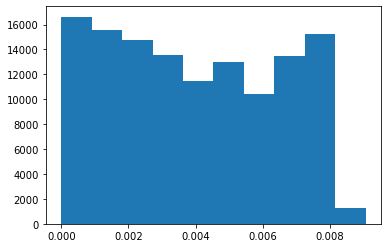

In [17]:
# generate synthetic data
DENSE_AMOUNT = 500


INPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
for i in range(DENSE_AMOUNT):
    assort = AG.GenAssortment_Fixed(N_prod, fixed_num = N_prod-1)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)


INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.mse_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1e-3)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max = 0.02).detach().numpy()

plt.hist(losses)

(array([5.0658e+04, 1.8422e+04, 1.9790e+04, 1.9491e+04, 1.4018e+04,
        2.5120e+03, 1.0700e+02, 2.0000e+00, 0.0000e+00, 5.0000e+02]),
 array([5.28730892e-10, 2.00000033e-03, 4.00000019e-03, 6.00000005e-03,
        8.00000038e-03, 9.99999978e-03, 1.20000001e-02, 1.39999995e-02,
        1.59999989e-02, 1.79999992e-02, 1.99999996e-02], dtype=float32),
 <BarContainer object of 10 artists>)

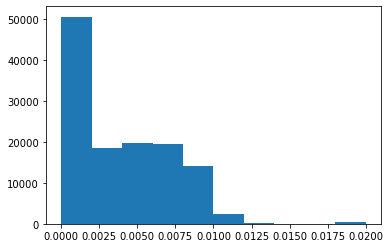

In [18]:
# generate synthetic data
DENSE_AMOUNT = 500


INPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
for i in range(DENSE_AMOUNT):
    assort = AG.GenAssortment_Even(N_prod, lam = 2/3)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)


INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.mse_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1e-3)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max = 0.02).detach().numpy()

plt.hist(losses)

## generally speaking, EXP4 is not as good as EXP2, both interms of accuracy and robustness. We can discard EXP4